# whats the probability of finding a thriller with a watch rate of 30-50 out of 1000 movies

In [7]:
import requests
import random
import os

# 🔑 Add your TMDb API key here (simplest way)
API_KEY = "fc6dc7eda645a26e28addcdd10ac9293"

BASE_URL = "https://api.themoviedb.org/3"

def get_genre_id(genre_name="Thriller"):
    """Finds the ID of the given genre."""
    url = f"{BASE_URL}/genre/movie/list"
    params = {"api_key": API_KEY}
    response = requests.get(url, params=params)
    response.raise_for_status()
    genres = response.json()["genres"]
    for g in genres:
        if g["name"].lower() == genre_name.lower():
            return g["id"]
    raise ValueError(f"Genre '{genre_name}' not found")

def get_random_movies(num_movies=1000):
    """Fetches approximately num_movies random movies."""
    movies = []
    total_pages = 500  # TMDb API max pages
    while len(movies) < num_movies:
        page = random.randint(1, total_pages)
        url = f"{BASE_URL}/discover/movie"
        params = {
            "api_key": API_KEY,
            "page": page,
            "sort_by": "popularity.desc",
        }
        r = requests.get(url, params=params)
        r.raise_for_status()
        movies.extend(r.json().get("results", []))
    return movies[:num_movies]

def main():
    thriller_id = get_genre_id("Thriller")
    movies = get_random_movies(1000)

    qualifying_thrillers = [
        m for m in movies
        if thriller_id in m.get("genre_ids", []) and 3.0 <= m.get("vote_average", 0) <= 5.0
    ]

    probability = len(qualifying_thrillers) / len(movies)
    print(f"Out of {len(movies)} movies, {len(qualifying_thrillers)} are thrillers with rating 3.0–5.0.")
    print(f"Estimated probability: {probability:.2%}")

if __name__ == "__main__":
    main()


Out of 1000 movies, 18 are thrillers with rating 3.0–5.0.
Estimated probability: 1.80%


In [8]:
pip install requests matplotlib

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.



🎬 Total movies: 1000
Thrillers in rating range 3.0–5.0: 27
Estimated probability: 2.70%


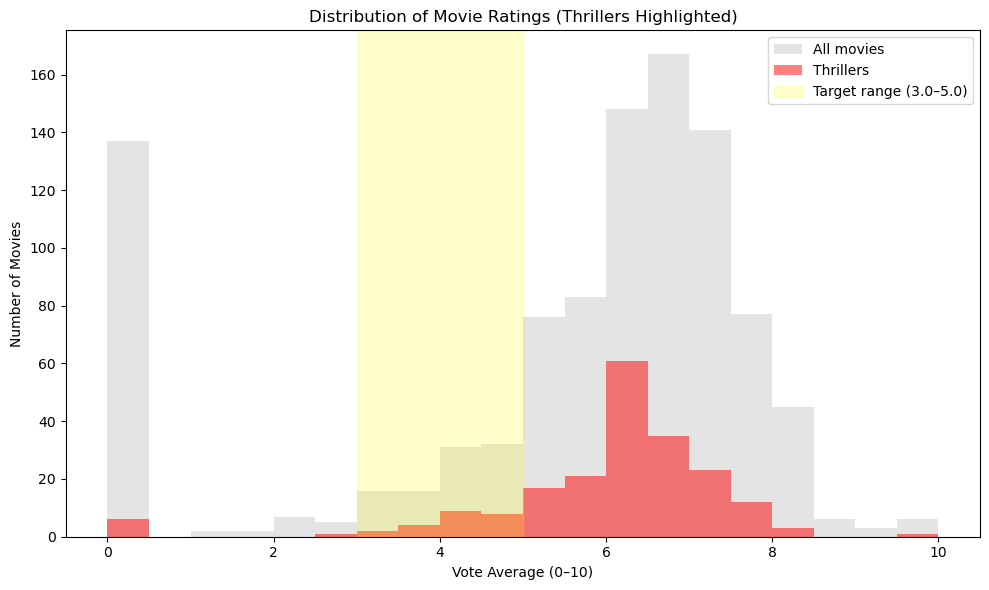

In [12]:
import requests
import random
import matplotlib.pyplot as plt

# 🔑 Insert your TMDb API key here
API_KEY = "fc6dc7eda645a26e28addcdd10ac9293"

BASE_URL = "https://api.themoviedb.org/3"

def get_genre_id(genre_name="Thriller"):
    """Finds the ID for the specified genre."""
    url = f"{BASE_URL}/genre/movie/list"
    params = {"api_key": API_KEY}
    response = requests.get(url, params=params)
    response.raise_for_status()
    genres = response.json()["genres"]
    for g in genres:
        if g["name"].lower() == genre_name.lower():
            return g["id"]
    raise ValueError(f"Genre '{genre_name}' not found")

def get_random_movies(num_movies=1000):
    """Fetch random movies by picking random TMDb pages."""
    movies = []
    total_pages = 500  # TMDb allows up to 500 discover pages
    while len(movies) < num_movies:
        page = random.randint(1, total_pages)
        url = f"{BASE_URL}/discover/movie"
        params = {
            "api_key": API_KEY,
            "page": page,
            "sort_by": "popularity.desc",
        }
        response = requests.get(url, params=params)
        response.raise_for_status()
        movies.extend(response.json().get("results", []))
    return movies[:num_movies]

def main():
    thriller_id = get_genre_id("Thriller")
    movies = get_random_movies(1000)

    # Extract rating info
    all_ratings = [m.get("vote_average", 0) for m in movies if m.get("vote_average") is not None]
    thriller_ratings = [
        m.get("vote_average", 0)
        for m in movies
        if thriller_id in m.get("genre_ids", []) and m.get("vote_average") is not None
    ]

    # Count thrillers in 3.0–5.0 range
    qualifying_thrillers = [r for r in thriller_ratings if 3.0 <= r <= 5.0]
    probability = len(qualifying_thrillers) / len(movies)

    print(f"\n🎬 Total movies: {len(movies)}")
    print(f"Thrillers in rating range 3.0–5.0: {len(qualifying_thrillers)}")
    print(f"Estimated probability: {probability:.2%}")

    # --- Plot histogram ---
    plt.figure(figsize=(10, 6))
    plt.hist(all_ratings, bins=20, color='lightgray', label='All movies', alpha=0.6)
    plt.hist(thriller_ratings, bins=20, color='red', label='Thrillers', alpha=0.5)

    # Highlight range 3.0–5.0
    plt.axvspan(3.0, 5.0, color='yellow', alpha=0.2, label='Target range (3.0–5.0)')

    plt.xlabel("Vote Average (0–10)")
    plt.ylabel("Number of Movies")
    plt.title("Distribution of Movie Ratings (Thrillers Highlighted)")
    plt.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
